In [1]:
from arviz import hdi
import pyabc
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix2
import scipy
import numpy as np
from pyabc.visualization import plot_kde_matrix_highlevel
from datetime import datetime
import pandas as pd
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix
import matplotlib.pyplot as plt
from pyabc.visualization import plot_kde_matrix_highlevel,plot_kde_matrix, plot_kde_2d

output_path = '../../figures'
path = '/Users/adsurbum/sim-data/single-model-abc/new4'
file_name = '2022-01-12-tau100-r1k'
# file_name = '2022-02-26-prior4-r1000'

history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,file_name))
history.get_all_populations()

,t,population_end_time,samples,epsilon,particles
0,-1,2022-01-14 13:46:08.672966,200,inf,1
1,0,2022-01-19 01:52:42.488890,387,0.748097,200
2,1,2022-01-19 08:26:13.560728,10617,0.365169,842
3,2,2022-01-19 19:45:47.372446,18993,0.193096,878
4,3,2022-01-20 14:54:18.526933,31127,0.145762,1000
5,4,2022-01-22 02:54:30.837951,57522,0.130815,1016


In [15]:
freem = '2021-12-29-an200-k1'
f_fixedm5 = '2022-02-15-m5-r100' #TODO change
f_fixedm6 = '2022-02-20-m6-r1000'
f_fixedm7 = '2022-02-15-m7-r100' #TODO change
allf = [freem, f_fixedm5, f_fixedm6, f_fixedm7]
labels = ['free $𝜇$','$𝜇=10^{-5}$','$𝜇=10^{-6}$','$𝜇=10^{-7}$']
print('checking termination epsilon for each run')
for i in allf:
    history = pyabc.History("sqlite:////Users/adsurbum/sim-data/single-model-abc/new4/{0}/{0}.db"
                        .format(i))
    print(i, round(history.get_all_populations()['epsilon'].values[-1],5))

checking termination epsilon for each run
2021-12-29-an200-k1 0.12659
2022-02-15-m5-r100 0.12981
2022-02-20-m6-r1000 0.12957
2022-02-15-m7-r100 0.1277


INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol 𝜇 from STIXGeneral


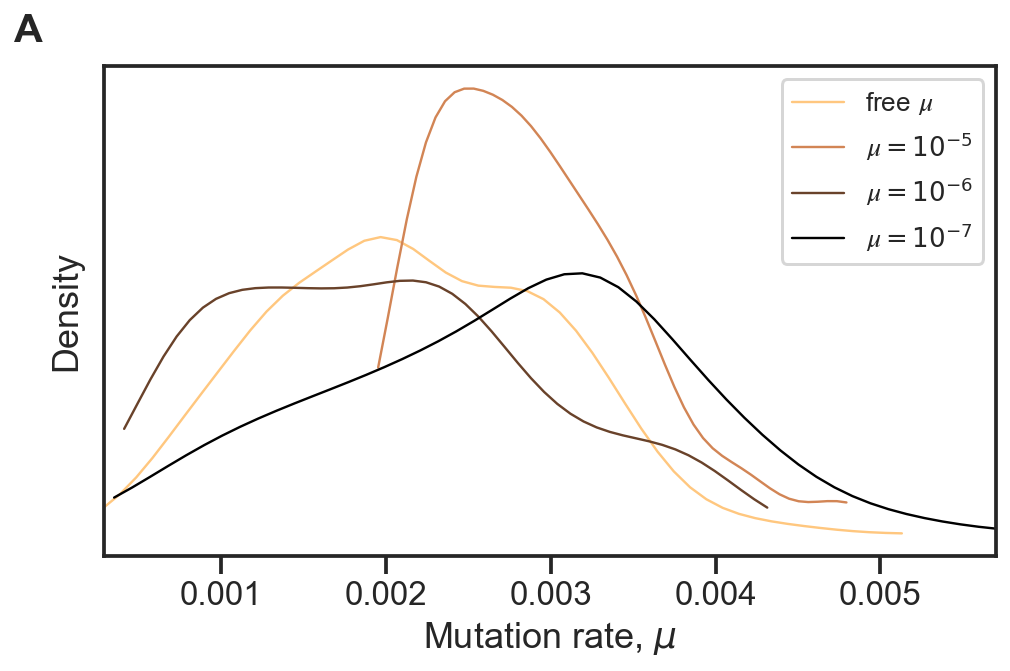

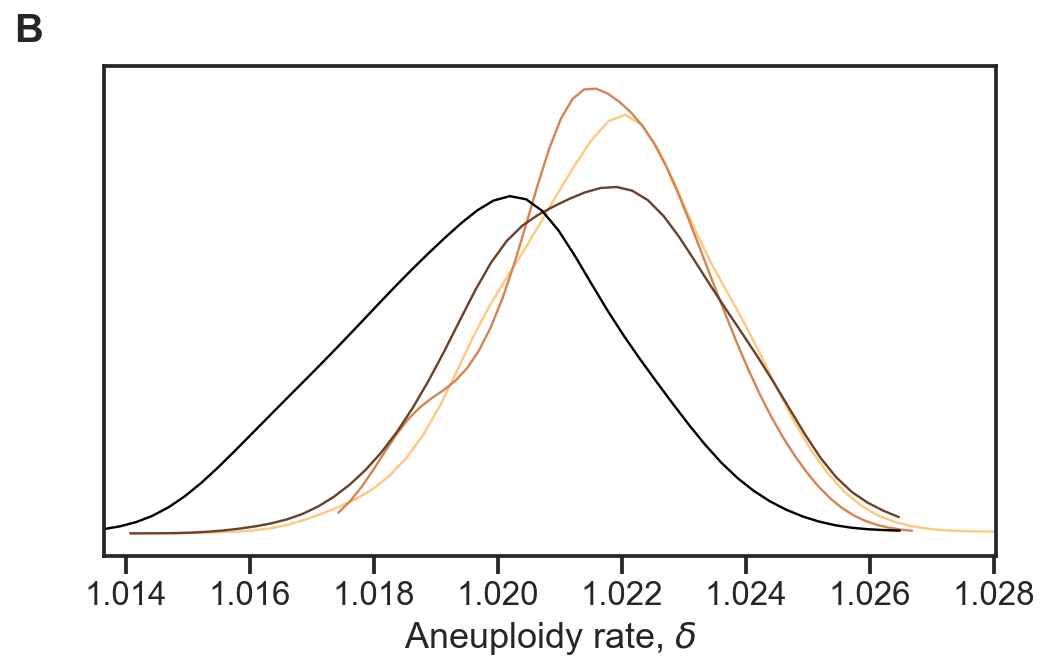

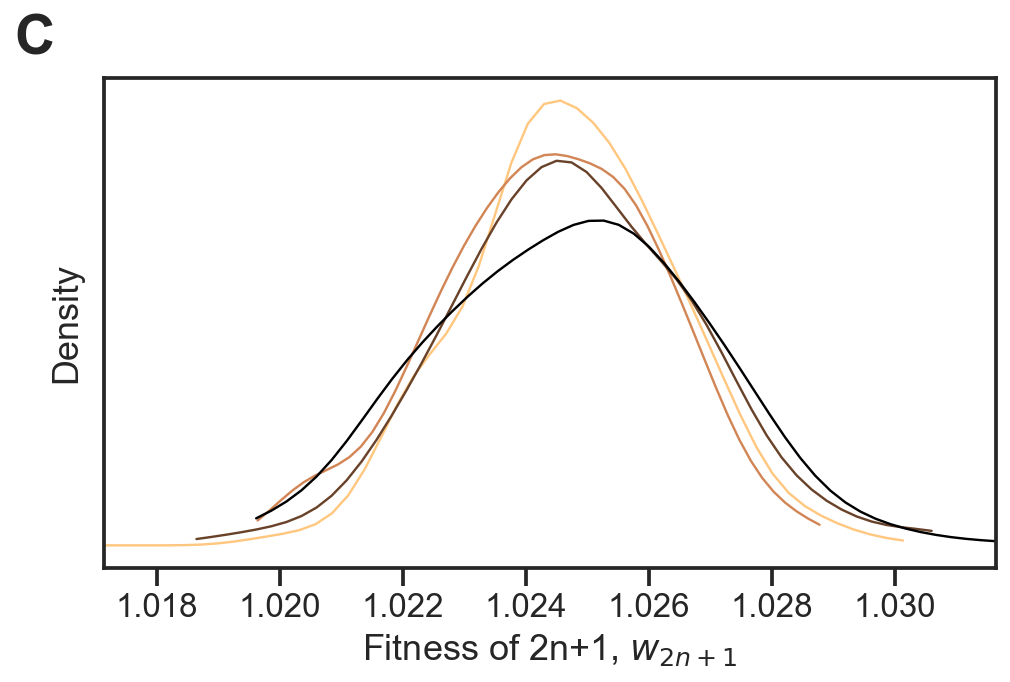

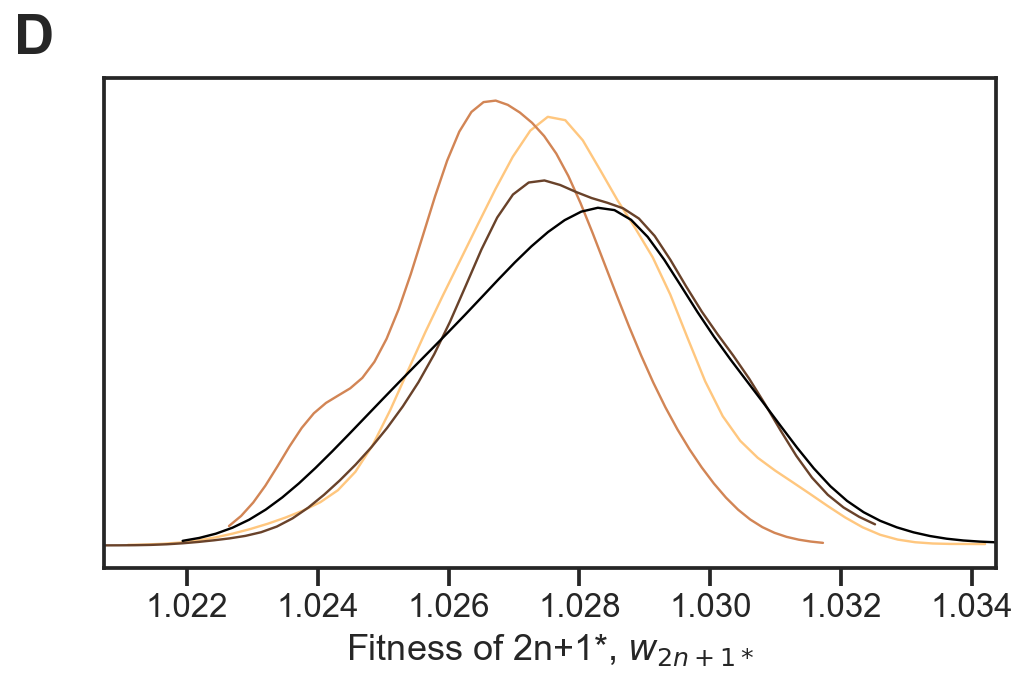

In [17]:
import seaborn as sns
sns.set(style="ticks",context='talk' ,rc={"lines.linewidth": 1.2, 'lines.markersize': 7})
from matplotlib import cm
import string

def compare(files, p, c, labels, ax):
    cm_subsection = np.linspace(0, 1.0, len(labels)) 
    colors = [ cm.copper(x) for x in cm_subsection]
    colors.reverse()
#     cm_subsection = linspace(0.2, 0.8, len(labels)) 
#     colors = [cm.hsv(0.2),cm.hsv(0.4),cm.hsv(0.5), 'blue', 'blue', cm.hsv(0.8)]
#     colors[-2] = colors[-3] = 'blue'
#     linestyles = ['solid']*len(labels)
#     linestyles[-2] = 'dashed'
    xmin = 1000
    xmax = -1000
    for f ,l, color in zip(files,labels,colors):
        history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,f))
        df, w = history.get_distribution(m=0, t=None)
        xmin = min(xmin, min(df[p]))
        xmax = max(xmax, max(df[p]))
        pyabc.visualization.plot_kde_1d(
            df,
            w,
            x=p,
            xname=c,
            ax=ax,
            label=f"{l}",
            color=color,
        )
    ax.set_xlim(xmin, xmax)

        
history = pyabc.History("sqlite:///{0}/{1}/{1}.db".format(path,f_fixedm5))
samples, weights = history.get_distribution(m=0, t=None)
c = ['Mutation rate, $\mu$', 'Aneuploidy rate, $\delta$', 'Fitness of 2n+1, $w_{2n+1}$', 
     'Fitness of 2n+1*, $w_{2n+1*}$', 'Fitness of 2n*, $w_{2n*}$']
p_to_c = {p:c for p,c in zip(list(samples.columns),c)} #param name of samples to column name that should be shown

i=-1

for p in samples.columns.values:
    i+=1
    fig, ax = plt.subplots(figsize=(8,4.5))
    compare(allf, p, p_to_c[p], labels, ax)
    ax.text(-0.1, 1.05, string.ascii_uppercase[i], transform=ax.transAxes, size=20 if i<2 else 28, weight='bold')
    ax.set_ylabel("Density" if i==0 or i==2 else "",labelpad=10)
    ax.axes.yaxis.set_ticks([])
    if i==0:
        ax.legend(bbox_to_anchor=(1, 1),loc='upper right',fontsize=13);
#     plt.gcf().savefig(f'{output_path}/mu-{string.ascii_uppercase[i]}.pdf', bbox_inches='tight', dpi=100)